In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib as pl
from collections import defaultdict
from functools import reduce

In [2]:
p = pl.Path('../output/initialw/100-8')
dirs = (x for x in p.iterdir())
ds = defaultdict()
for d in dirs:
    name = int(d.name.split('w')[2][:-4])
    df = pd.read_csv(d).sort_values('seed')
    df = df.rename(columns={'initial_weight': 'initial-weight'})
    if df['initial-weight'][0] != 50:
        continue
    df = df.set_index('seed')
    df = df.assign(dispersion=lambda x: x.desviation/(x.range * 0.5) * 100)
    ds[name] = df
ds[1].head()

,initial-weight,weight,none-anonymity,mean,median,desviation,min,max,range,person1,person5,person10,person15,dispersion
seed,,,,,,,,,,,,,,
0,50,1,0,14.757637,13.5,8.115245,2.200000,40.0,37.800000,27.0,7.0,3.0,2.200000,42.937805
1,50,1,0,14.719378,13.0,8.045979,2.250000,35.0,32.750000,12.0,5.4,3.4,3.000000,49.135747
2,50,1,0,14.742855,12.5,8.346287,2.400000,33.0,30.600000,27.0,5.6,3.7,3.200000,54.550898
3,50,1,0,14.786005,13.0,8.051155,1.928571,41.0,39.071429,27.0,7.4,3.8,2.400000,41.212493
4,50,1,0,14.811943,13.0,8.340490,2.333333,45.0,42.666667,30.0,5.8,2.6,2.333333,39.096048


In [3]:
ds[10]['initial-weight']

seed
0      50
1      50
2      50
3      50
4      50
       ..
96     50
97     50
98     50
99     50
100    50
Name: initial-weight, Length: 104, dtype: int64

In [4]:
ls_df = list(map(lambda x: x.mean().to_frame().transpose(), ds.values()))
ls_df

[   initial-weight  weight  none-anonymity      mean    median  desviation  \
 0            50.0    28.0        0.682692  13.56139  9.439845    9.005091   
 
         min        max      range    person1   person5  person10  person15  \
 0  1.240828  70.048077  68.807249  21.144231  5.896154  4.233654  3.380769   
 
    dispersion  
 0    26.87137  ,
    initial-weight  weight  none-anonymity       mean     median  desviation  \
 0            50.0     9.0             0.0  14.098387  11.409455    8.168671   
 
         min        max      range    person1   person5  person10  person15  \
 0  1.982674  53.019231  51.036556  22.846154  6.026923  3.988462  3.189744   
 
    dispersion  
 0   32.565504  ,
    initial-weight  weight  none-anonymity       mean    median  desviation  \
 0            50.0    37.0        1.490385  13.389279  8.924472    9.339123   
 
         min        max      range    person1   person5  person10  person15  \
 0  1.095994  72.677885  71.581891  20.634615  6.33

In [5]:
getc= lambda c : reduce(lambda x, y: x.append(y),list(map(lambda x: x[c], ls_df)))
getcs = lambda lis: lambda c : reduce(lambda x, y: x.append(y),list(map(lambda x: x[c], lis)))

def show(ls_df, xc, yc):
    plt.scatter(x=getc(xc),y=getc(yc))

In [6]:
def show_people(people, color_people):
    gen =(getc(p).to_frame()
          .rename(columns={p: 'person'})
          .assign(color=lambda x: c) for p, c in zip(people, color_people))
    res = reduce(lambda x, y: x.append(y), gen)
    xdf = getc('weight').to_frame()
    xdf = reduce(lambda x,y: x.append(y), [xdf] * len(people))
    plt.scatter(x=xdf['weight'], y=res['person'], c=res['color'])
getc('person1').to_frame().assign(color=lambda x: '#cb3ba2')

,person1,color
0,21.144231,#cb3ba2
0,22.846154,#cb3ba2
0,20.634615,#cb3ba2
0,20.038462,#cb3ba2
0,21.701923,#cb3ba2
...,...,...
0,20.557692,#cb3ba2
0,20.125000,#cb3ba2
0,20.519231,#cb3ba2
0,19.125000,#cb3ba2


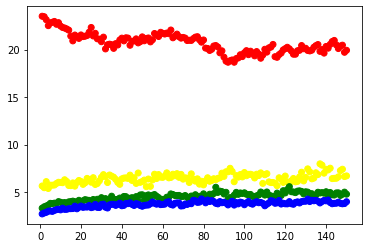

In [7]:
show_people(['person1', 'person5', 'person10', 'person15'], ['red', 'yellow', 'green', 'blue'])

En quant el valor ideal del pes de signatura, veiem que la weight ha de ser un 20% menor que la initial-weight per tal de no perdre anonimitat. En altres casos es pot tenir participants sense anonimitat.
És a dir, el pes ha ser:
```
w <= 0.2 * iw
```

In [8]:
res = reduce(lambda x, y: x.append(y), ls_df).sort_values('weight')
res = res.rename(columns={'none-anonymity': 'none'})
res[res.none == 0]

,initial-weight,weight,none,mean,median,desviation,min,max,range,person1,person5,person10,person15,dispersion
0,50.0,1.0,0.0,14.758269,13.131410,8.117420,2.190028,39.144231,36.954203,23.519231,5.636538,3.297115,2.691026,44.207169
0,50.0,2.0,0.0,14.611852,12.921474,8.029825,2.190090,40.798077,38.607987,23.471154,5.451923,3.441346,2.791026,41.871346
0,50.0,3.0,0.0,14.493975,12.718750,7.972077,2.157379,42.221154,40.063775,23.153846,6.096154,3.524038,2.856410,40.067109
0,50.0,4.0,0.0,14.414793,12.417468,8.009563,2.141402,44.701923,42.560522,22.528846,5.371154,3.625000,2.976282,38.093820
0,50.0,5.0,0.0,14.342833,12.254006,8.051936,2.117454,45.846154,43.728700,22.817308,5.719231,3.804808,3.008974,37.167528
0,50.0,6.0,0.0,14.278818,11.916346,8.086142,2.117795,48.509615,46.391820,22.884615,5.719231,3.787500,2.955769,35.354881
0,50.0,7.0,0.0,14.241678,11.726923,8.157705,2.043656,49.461538,47.417882,22.971154,5.734615,3.825962,3.058974,34.953072
0,50.0,9.0,0.0,14.098387,11.409455,8.168671,1.982674,53.019231,51.036556,22.846154,6.026923,3.988462,3.189744,32.565504


## Llindar de mínim i màxim
Sabent el màxim que podrà ser weight és 0.2 * iw, ara anirem a veure el mínim, que serà quan el preferential attachment no tingui pes suficient per afavorir les persones amb més missatges.

In [13]:
res

,person,color
0,21.144231,red
0,22.846154,red
0,20.634615,red
0,20.038462,red
0,21.701923,red


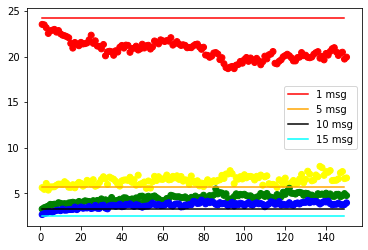

In [10]:
people = ['person1', 'person5', 'person10', 'person15']
color_people = ['red', 'yellow', 'green', 'blue']
gen =(getc(p).to_frame()
      .rename(columns={p: 'person'})
      .assign(color=lambda x: c) for p, c in zip(people, color_people))
res = reduce(lambda x, y: x.append(y), gen)
xdf = getc('weight').to_frame()
xdf = reduce(lambda x,y: x.append(y), [xdf] * len(people))
x = np.arange(1, 150, 1)
def fun(const):
    @np.vectorize
    def y(x):
        return const
    return y
plt.scatter(x=xdf['weight'], y=res['person'], c=res['color'])
plt.plot(x, fun(24.192308)(x), c='red', label='1 msg')
plt.plot(x, fun(5.678846)(x), c='orange', label='5 msg')
plt.plot(x, fun(3.293269)(x), c='black', label='10 msg')
plt.plot(x, fun(2.541026)(x), c='cyan', label='15 msg')
plt.legend()